# Wish - Sales of Summer Clothes

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline


In [5]:
df = pd.read_csv('/Users/andreaseet/Documents/kaggle/wish/summer-products-with-rating-and-performance_2020-08.csv')#
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [6]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

Some of the initial questions that could be asked using this data are 1) What is the correlation between ad boosts and units sold? What about the effect of the interaction between retail price and ad boosts and the units sold? 2) Does the categories of the ratings affect the units sold? 3) How does the merchant rating affect the sales of merchandise? 4) What is the effect of the urgency banner and the inventory total affect sales (units_sold)?

Many of the the variables could potentially interact to forecast increased sales. One of the analyses that could be conducted is to determine which features would best predict the highest number of units sold to increase sales for the merchants.

We will check if there are missing variables.

In [7]:
df['uses_ad_boosts'] = df['uses_ad_boosts']
df['badge_local_product'] = df['badge_local_product']
df['badge_product_quality'] = df['badge_product_quality']
df['badge_fast_shipping'] = df['badge_fast_shipping']
df['shipping_is_express'] = df['shipping_is_express']
df['has_urgency_banner'] = df['has_urgency_banner']
df['merchant_has_profile_picture'] = df['merchant_has_profile_picture']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
title                           1573 non-null object
title_orig                      1573 non-null object
price                           1573 non-null float64
retail_price                    1573 non-null int64
currency_buyer                  1573 non-null object
units_sold                      1573 non-null int64
uses_ad_boosts                  1573 non-null int64
rating                          1573 non-null float64
rating_count                    1573 non-null int64
rating_five_count               1528 non-null float64
rating_four_count               1528 non-null float64
rating_three_count              1528 non-null float64
rating_two_count                1528 non-null float64
rating_one_count                1528 non-null float64
badges_count                    1573 non-null int64
badge_local_product             1573 non-null int64
badge_product_quality           1573 non-nul

In [8]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

It appears that we have 1573 entries of clothing items with 45 null variables for each of the five rating categories. A hypothesis for why this might happen is that there might be 45 items that were not rated. We can see that having the urgency banner is related to the urgency text variable as there are 1100 missing values of each. For these two variables regarding urgency, I can create binary 1 and 0 values for whether the item has or does not have an urgency banner and likewise for the urgency text column.

I will create a summary table of descriptive statistics to further explore the data.

In [9]:
df['has_urgency_banner'].replace(np.nan, 0, inplace= True)

I replaced the missing values for the urgency banner with 0 since the variable is binary to avoid problems with missing data in regression modeling later. The 0 indicates that the item did not have an urgency banner.

In [10]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

Take a look at the missing values in ratings to see if that is having an effect on the number of sales.

In [11]:
df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,5.0,0,NaN,NaN,NaN,NaN,NaN
112,5.0,0,NaN,NaN,NaN,NaN,NaN
126,5.0,0,NaN,NaN,NaN,NaN,NaN
189,5.0,0,NaN,NaN,NaN,NaN,NaN
216,5.0,0,NaN,NaN,NaN,NaN,NaN
248,5.0,0,NaN,NaN,NaN,NaN,NaN
309,5.0,0,NaN,NaN,NaN,NaN,NaN
346,5.0,0,NaN,NaN,NaN,NaN,NaN
348,5.0,0,NaN,NaN,NaN,NaN,NaN
375,5.0,0,NaN,NaN,NaN,NaN,NaN


These values do not seem to make sense as the items have a rating of five, but do not have rating counts, meaning that a person did not rate the item.

In [12]:
def ratings_to_zero(rating_and_count):
    rating = rating_and_count[0]
    count = rating_and_count[1]
    
    if count == 0:
        rating = 0
    else:
        rating = rating
        
    return rating

In [13]:
df['rating_five_count'].fillna(0, inplace=True)
df['rating_four_count'].fillna(0, inplace=True)
df['rating_three_count'].fillna(0, inplace=True)
df['rating_two_count'].fillna(0, inplace=True)
df['rating_one_count'].fillna(0, inplace=True)


df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count


Now we do not have any ratings with a value of 5 that had a rating count of 0.

In [14]:
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,...,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,4.0,890.0,430.0,174.0,131.0,62.0,...,0.0,33.0,2.0,0.0,40.0,50.0,0.0,26496.0,4.0,0.0
std,4.0,30.0,9357.0,0.0,1.0,1984.0,969.0,396.0,308.0,150.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,0.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,24.0,10.0,4.0,3.0,1.0,...,0.0,6.0,2.0,0.0,31.0,50.0,0.0,1987.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,72.0,29.0,22.0,10.0,...,0.0,50.0,2.0,0.0,40.0,50.0,0.0,7936.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,394.0,163.0,121.0,59.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


Descriptive statistics of units sold

In [15]:
print('Median of units sold is',df['units_sold'].median())
print('Mean of units sold is',df['units_sold'].mean())
df['units_sold'].value_counts()

Median of units sold is 1000.0
Mean of units sold is 4339.005085823268


100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

Gather the less than 10 units sold items.

In [16]:
def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold

In [17]:
df['units_sold'] = df['units_sold'].apply(below_ten)

In [18]:
df['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

A look at the products for 100000 sales and 10 sales and find the average of the rating to see whether that may be a factor for units sold.

In [19]:
units_sold_100000 = df[df['units_sold'] == 100000]
units_sold_100000

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,2018 New Fashion Women's Tops Sexy Strappy Sle...,5.00,25,EUR,100000,1,3.83,17980,8290.0,...,139223,3.933581,5708773c3c02161b3f8c7900,0,NaN,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,summer,2020-08
92,Femmes Camisole extensible Spaghetti Strap Lon...,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,EUR,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,summer,2020-08
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,EUR,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,summer,2020-08
251,T-shirt à manches courtes en mousseline de soi...,Womens Summer Red White and Blue Chiffon Short...,5.00,33,EUR,100000,0,3.98,13789,6862.0,...,366898,4.036081,53082ea15aefb07dfe1f2a4f,0,NaN,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,summer,2020-08
1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,EUR,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,summer,2020-08
1168,Nouvelle arrivée femmes été sexy robe de soiré...,Women's Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,EUR,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,NaN,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,summer,2020-08


In [20]:
units_sold_100000[['rating']].mean(axis = 0)

rating    3.836667
dtype: float64

These 6 items seem to have high rating with an average of 3.84.

In [21]:
units_sold_10 = df[df['units_sold'] == 10]
units_sold_10

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
41,Mode féminine été bretelles spaghetti imprimé ...,Women's Summer Fashion Spaghetti Strap Floral ...,7.00,68,EUR,10,0,1.50,2,0.0,...,397,3.858942,5d48eef4b5144c50c2ac0af3,0,NaN,https://www.wish.com/c/5ea69521f5e1e65a3c70faa8,https://contestimg.wish.com/api/webimage/5ea69...,5ea69521f5e1e65a3c70faa8,summer,2020-08
46,Costume de sport cool pour hommes d'été Vêteme...,Summer mens cool sport suit Sports Wear Casual...,16.00,14,EUR,10,0,3.00,3,0.0,...,31,3.548387,5e61c817039ce2184a0ed392,0,NaN,https://www.wish.com/c/5e9a74e447f7d92c8db8d14b,https://contestimg.wish.com/api/webimage/5e9a7...,5e9a74e447f7d92c8db8d14b,summer,2020-08
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,EUR,10,0,5.00,0,0.0,...,1496,4.169786,592955ef980a346d826f7bfc,0,NaN,https://www.wish.com/c/5ed0dfc51fa8446451b19c0d,https://contestimg.wish.com/api/webimage/5ed0d...,5ed0dfc51fa8446451b19c0d,summer,2020-08
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.00,0,0.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1 Pcs Chaise De Natation / Lit Piscine Siège G...,1 Pcs Swimming Chair/Bed Swimming Pool Seat In...,8.00,7,EUR,10,1,4.50,2,1.0,...,173992,4.326463,538f4f18ab980a5167a1d722,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5ee3257cb3c7be38e3ec7c74,https://contestimg.wish.com/api/webimage/5ee32...,5ee3257cb3c7be38e3ec7c74,summer,2020-08
1481,Mode féminine été bretelles spaghetti imprimé ...,Women's Summer Fashion Spaghetti Strap Floral ...,8.00,68,EUR,10,0,5.00,0,0.0,...,626,3.916933,5d3aa36072b0c915fe6b8fbd,0,NaN,https://www.wish.com/c/5eb2200b989caa081980b812,https://contestimg.wish.com/api/webimage/5eb22...,5eb2200b989caa081980b812,summer,2020-08
1488,Nouvelles femmes d'été mode couleur unie short...,New Women Summer Fashion Solid Color Shorts Ca...,14.00,14,EUR,10,0,5.00,0,0.0,...,1134,3.955908,5add589edb5f1f32114d07df,0,NaN,https://www.wish.com/c/5eccb455d4eb5d46b00be0ed,https://contestimg.wish.com/api/webimage/5eccb...,5eccb455d4eb5d46b00be0ed,summer,2020-08
1491,Costume de sport cool pour hommes d'été Vêteme...,Summer mens cool sport suit Sports Wear Casual...,11.00,168,EUR,10,0,3.33,3,0.0,...,47,3.914894,5e71bc2ff2bef60050bd3a86,0,NaN,https://www.wish.com/c/5e9dad8cbc19c300417e1733,https://contestimg.wish.com/api/webimage/5e9da...,5e9dad8cbc19c300417e1733,summer,2020-08


In [22]:
units_sold_10[['rating']].mean(axis = 0)

rating    4.316667
dtype: float64

The rating for items that were 10 units sold had a rating of 4.32 which was higher than the rating that had 100000 units sold.

What if we wanted to see what percentage of the clothing received greater than or equal to a rating of 4 out of 5?

In [23]:
def is_successful(rating):
    if rating >=4:
        return 1
    else:
        return 0

Percent of successful products:  37.95295613477432


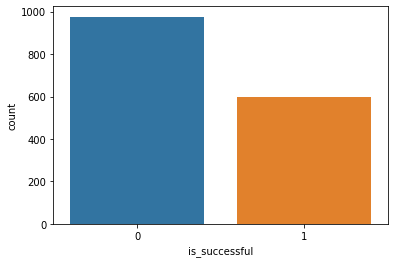

In [24]:
df['is_successful'] = df['rating'].apply(is_successful)
df['is_successful'] = df['rating'].apply(is_successful).astype('category')
print('Percent of successful products: ', df['is_successful'].value_counts()[1] / len(df['is_successful'])*100)
sns.countplot(data=df, x='is_successful')
plt.show()

We see that 38.0% of products received a rating of 4 or greater.

What if we wanted to see which products had the most sales? We will choose units that sold more than the median of 1000 units sold.

In [25]:
def best_seller(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0

Percent of successful products:  33.057851239669425


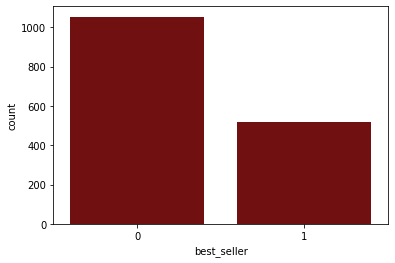

In [26]:
df['best_seller'] = df['units_sold'].apply(best_seller)
#df['best_seller'] = df['units_sold'].apply(best_seller).astype('category')
print('Percent of successful products: ', df['best_seller'].value_counts()[1] / len(df['best_seller'])*100)
sns.countplot(data=df, x='best_seller', color ='maroon')
plt.show()

The percent of items that had over 1000 units sold was 33%.

In [27]:
df.groupby('uses_ad_boosts').count()

,title,title_orig,price,retail_price,currency_buyer,units_sold,rating,rating_count,rating_five_count,rating_four_count,...,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,is_successful,best_seller
uses_ad_boosts,,,,,,,,,,,,,,,,,,,,,
0,892,892,892,892,892,892,892,892,892,892,...,892,892,127,892,892,892,892,892,892,892
1,681,681,681,681,681,681,681,681,681,681,...,681,681,99,681,681,681,681,681,681,681


By grouping by using ad boosts, we can see that there were 892 items that used an ad boost and 681 that did not.

In [28]:
print('Percent of products using ad boosts: ', df['uses_ad_boosts'].value_counts()[1] / len(df['uses_ad_boosts'])*100)

Percent of products using ad boosts:  43.293070565797834


Text(0.5, 1.0, 'Use of ad boost effect on sales')

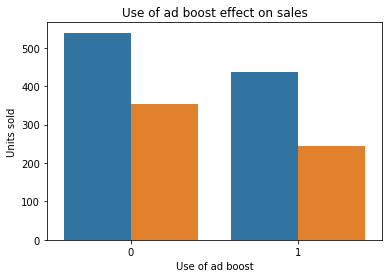

In [29]:
sns.countplot(data=df, x='uses_ad_boosts', hue='is_successful') 
plt.ylabel('Units sold')
plt.xlabel('Use of ad boost')
plt.legend('',frameon=False)
plt.title('Use of ad boost effect on sales')

In [30]:
pd.crosstab(df['uses_ad_boosts'], df['is_successful'])

is_successful,0,1
uses_ad_boosts,,
0,539,353
1,437,244


In [31]:
pd.crosstab(df['uses_ad_boosts'], df['units_sold'])

units_sold,10,50,100,1000,5000,10000,20000,50000,100000
uses_ad_boosts,,,,,,,,,
0,51,50,265,218,134,104,54,13,3
1,12,26,244,187,83,73,49,4,3


In [32]:
df["Total Amount"] = df["units_sold"] * df["retail_price"]

Take a look at the top 10 products that made the most money.

Text(0.5, 1.0, 'Total Amount Made by Items')

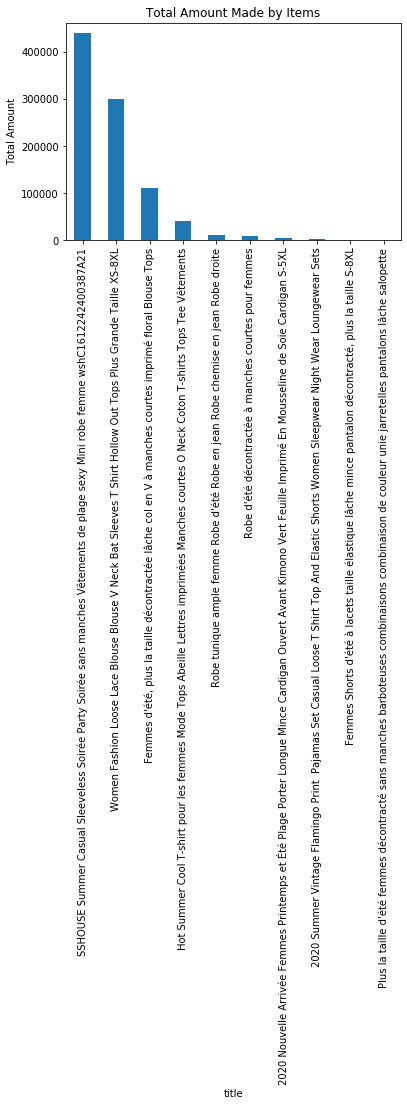

In [33]:
df_items = df[["title", "Total Amount"]].head(10)
df_items.groupby("title").sum().sort_values("Total Amount", ascending=False).plot(kind="bar")
plt.ylabel('Total Amount')
plt.legend('',frameon=False)
plt.title('Total Amount Made by Items')

In [34]:
df_items = df_items.rename(columns={"title": "item"})
df_items = df_items.sort_values(by=['Total Amount'], ascending=False)
df_items

,item,Total Amount
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,440000
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,300000
9,"Femmes d'été, plus la taille décontractée lâch...",110000
3,Hot Summer Cool T-shirt pour les femmes Mode T...,40000
7,Robe tunique ample femme Robe d'été Robe en je...,11000
8,Robe d'été décontractée à manches courtes pour...,8400
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,4300
0,2020 Summer Vintage Flamingo Print Pajamas Se...,1400
4,Femmes Shorts d'été à lacets taille élastique ...,300
5,Plus la taille d'été femmes décontracté sans m...,90


In [35]:
result = scipy.stats.linregress(df['price'], df['rating'])
slope = result.slope

In [36]:
intercept = result.intercept
r = result.rvalue
p = result.pvalue
sd = result.stderr

In [37]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=3.76+0.01x, r=0.05'

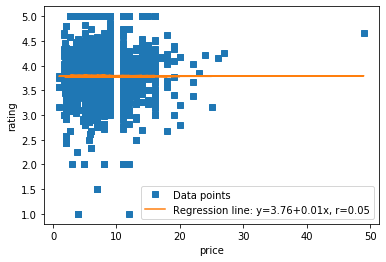

In [38]:
fig, ax = plt.subplots()
ax.plot(df['price'], df['rating'], linewidth=0, marker='s', label='Data points')
ax.plot(df['price'], intercept + slope * df['rating'], label=line)
ax.set_xlabel('price')
ax.set_ylabel('rating')
ax.legend(facecolor='white')
plt.show()

There is no correlation between the price of the item and the rating which can be interpreted as people are not rating cheaper products higher than more expensive products and vice versa. There are other factors outside of the price that affect the rating.

# Building Model

I will now build a linear model to train and test my data and predict what products will have higher units sold. 

In [39]:
full_data_len = len(df)

# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general
np.random.seed(1337)
shuffled_indices = np.random.permutation(full_data_len)

# Set train_indices to the first 80% of shuffled_indices and and test_indices to the rest.
train_indices = shuffled_indices[0:1258]
test_indices = shuffled_indices[1259:1572]

# Create train and test` by indexing into `full_data (df)` using 
# `train_indices` and `test_indices`
train = df.iloc[train_indices]
test = df.iloc[test_indices]

Reusable Pipeline

In [40]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    # Select Features
    data = select_columns(data,
                          'units_sold',
                          'rating', 
                          'uses_ad_boosts', 
                          'has_urgency_banner',
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['units_sold'], axis = 1)
    y = data.loc[:, 'units_sold']
    
    return X, y

In [41]:
# Pre-process our training and test data in exactly the same way
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

In [42]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression(fit_intercept=True)

In [43]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

Is our linear model any good at predicting units sold? Let's measure the quality of our model by calculating the Root-Mean-Square Error (RMSE) between our predicted units sold and the true prices stored in units_sold.

$$\text{RMSE} = \sqrt{\dfrac{\sum_{\text{# of observations in test set}}(\text{actual units_sold} - \text{predicted units_sold})^2}{\text{# of observations in data set}}}$$



In [44]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    result = np.sqrt(((predicted - actual) ** 2).mean())
    return result

In [45]:
training_error = rmse(y_train, y_fitted) #y_test are the units sold
test_error = rmse(y_test, y_predicted) #how far away testing data set are from y_test
(training_error, test_error)

(9787.53362192069, 7321.932576136176)

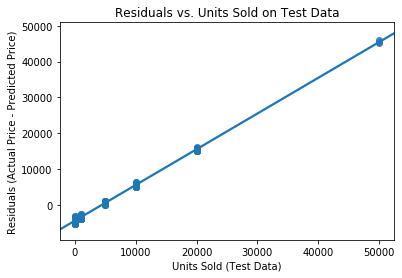

In [46]:
residuals = y_test - y_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Units Sold (Test Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Units Sold on Test Data");

Ideally, we would see a horizontal line of points at 0 indicating perfect prediction. The next best thing would be a homogenous set of points centered at 0. I could try adding more features to help improve the accuracy and lower the test error to better predict the units sold. This could potentially improve the model's accuracy as the error they introduce could be reducible as they are will be present in the training data. Another way is to can add more data by collecting more rows to drive variance down (without a trade-off in bias) to potentially improve the model's accuracy as more data might cause the training data to decrease bias.

In [47]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    # Select Features
    data = select_columns(data,
                          'units_sold',
                          'rating', 
                          'uses_ad_boosts', 
                          'has_urgency_banner',
                          'shipping_option_price',
                          'merchant_rating',
                          'badge_product_quality',
                          'badge_fast_shipping',
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['units_sold'], axis = 1)
    y = data.loc[:, 'units_sold']
    
    return X, y

In [48]:
# Pre-process our training and test data in exactly the same way
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

In [49]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression(fit_intercept=True)

In [50]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

In [51]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    result = np.sqrt(((predicted - actual) ** 2).mean())
    return result

In [52]:
training_error = rmse(y_train, y_fitted) #y_test are the units sold
test_error = rmse(y_test, y_predicted) #how far away testing data set are from y_test
(training_error, test_error)

(9707.406835530477, 7294.621557594752)

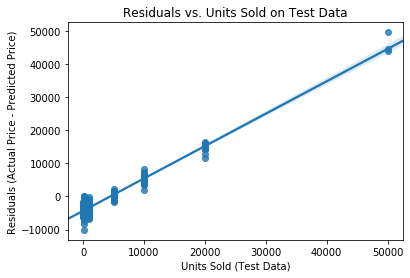

In [53]:
residuals = y_test - y_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Units Sold (Test Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Units Sold on Test Data");

Use ANOVA to compare the nested models

In [54]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m01 = ols('units_sold ~ rating + uses_ad_boosts + has_urgency_banner', data=df).fit()
m02 = ols('units_sold ~ rating + uses_ad_boosts + has_urgency_banner + shipping_option_price + merchant_rating + badge_product_quality + badge_fast_shipping', data=df).fit()
anovaResults = anova_lm(m01, m02)
print(anovaResults)

   df_resid           ssr  df_diff       ss_diff        F    Pr(>F)
0    1569.0  1.373099e+11      0.0           NaN      NaN       NaN
1    1565.0  1.350138e+11      4.0  2.296139e+09  6.65387  0.000026


/Users/andreaseet/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/andreaseet/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/andreaseet/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


It appears that from the F-statistic, there is a statistically significant difference between the models so we might want to include more than the rating, using ad boosts, and having an urgency banner as predictor variables. Some next steps would be to test interactions between variables or if we wanted to test a certain feature of the Wish website, we could perform more analyses to determine its effect on the number of units sold.

# Determining the best tags for increasing sales

In [55]:
from wordcloud import WordCloud, STOPWORDS

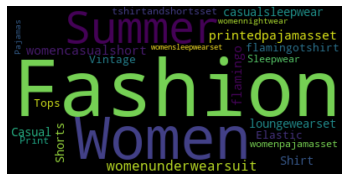

In [56]:
# Start with one tag:
text = df.tags[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

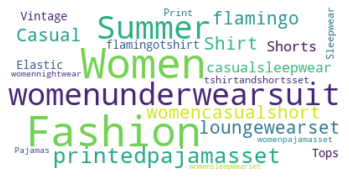

In [57]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
text = " ".join(word for word in df.tags)
print ("There are {} words in the combination of all tags.".format(len(text)))

There are 267631 words in the combination of all tags.


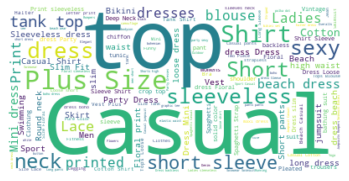

In [59]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["women", "summer", "fashion"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
from PIL import Image

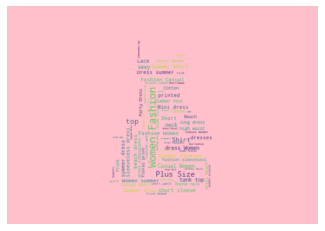

In [61]:
dress_mask = np.array(Image.open("/Users/andreaseet/Documents/kaggle/dress3.png"))
wc = WordCloud(background_color="pink", mask=dress_mask)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

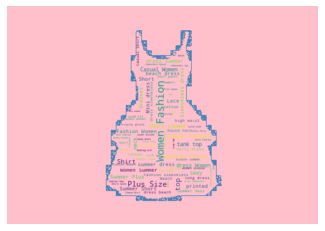

In [62]:
wc = WordCloud(background_color="pink", mask=dress_mask, contour_width=1, contour_color='steelblue')
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('fig1.png', dpi = 300)
plt.show()

During this analysis, I cleaned data by imputation for the urgency banner missing variables and replaced the ratings that did not have rating counts. I conducted descriptive statistics of the units sold as our aims were to determine how we can best predict items that are producing the best salses during the summer. Next, I looked at the products for 100000 sales and 10 sales and found the average of the rating to see whether that may be a factor for units sold. I also created a table of the top 10 items that garnered the most money by creating a variable for the retail price multipled by the number of items sold. I found that there was no correlation between the price and rating of the item.

In terms of analysis, I built a linear regression model by training and testing data to predict which products results in higher units sold. I measured the quality of both models and compared the nested models using ANOVA. In future steps, I would test interaction between variables and conduct more research on the badges or merchant titles to see whether those might be interesting independent variables to include. If we wanted to test whether ads were working towards increasing sales, I could take a deeper dive into looking at the ad boost variable and see if I could segment ads by the different times and frequency that the ads appear.

I was also interested in testing a new skill by creating a word cloud to visualize the frequency of the most popular tags used for the summer collection on Wish. I first created a word cloud, but felt that the words "women", "fashion", and "suit" would not make great tags as users from this dataset would want more specific tags as the consumer base was women's clothing. I then used the stop words feature to remove these words from the word cloud. I found a dress image that I used as an outline for the word cloud. Within this word cloud, the tags that are most popular could be used to influence the UI team to include tags that could help customers navigate to what they want to purchase more easily.